In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
df = pd.read_csv(r"C:\Users\mohan\Downloads\Gold_Price_Data.csv")

In [6]:
gld_series = df['GLD']

In [8]:
gld_series

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

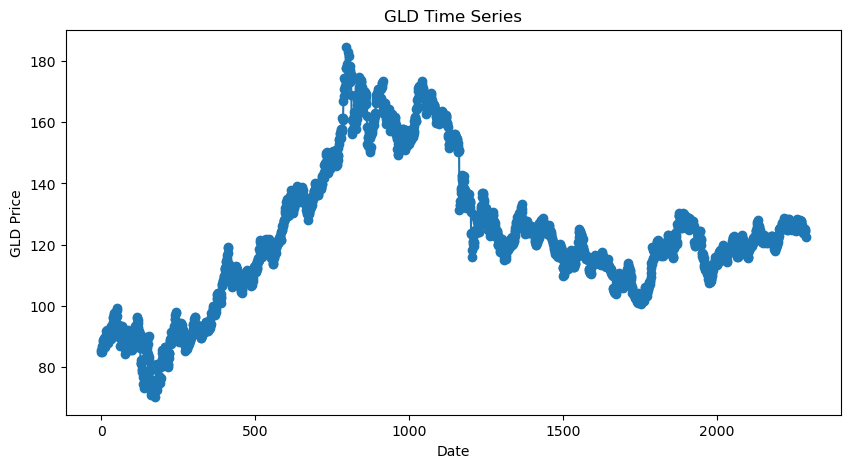

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(gld_series, marker='o')
plt.title("GLD Time Series")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.show()

## Check Stationarity Using the Augmented Dickey-Fuller (ADF) Test

In [10]:
np.log(5)

1.6094379124341003

In [13]:
1.6094379124341003, 1.791759469228055, 1.9459101490553132

(1.6094379124341003, 1.791759469228055, 1.9459101490553132)

In [14]:
5,6,7

(5, 6, 7)

## P values <= 0.05 --> Null hypothisis

In [16]:
result = adfuller(gld_series)
print("ADF Statistic: %f" % result[0])
print("p-value: %f" % result[1])

ADF Statistic: -1.618884
p-value: 0.473314


In [19]:
if result[1] > 0.05:
    print("Data is non-stationary. Differencing the data to achieve stationarity.")

Data is non-stationary. Differencing the data to achieve stationarity.


0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

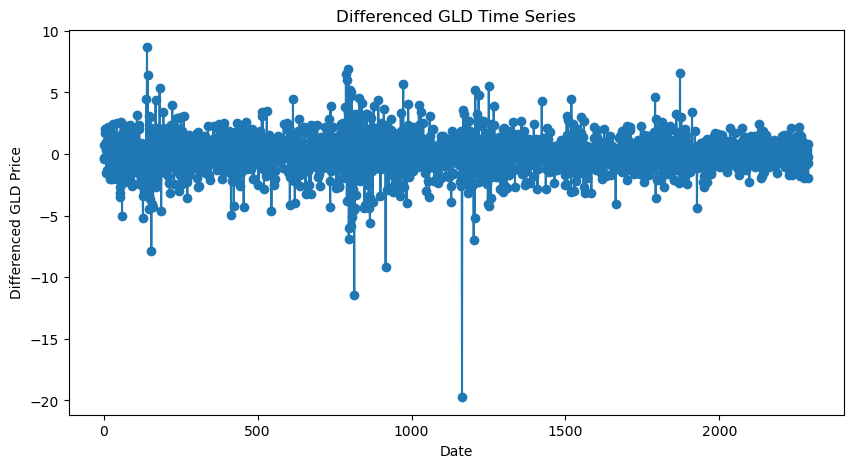

In [20]:
gld_diff = gld_series.diff().dropna()
    
# Plot the differenced series
plt.figure(figsize=(10, 5))
plt.plot(gld_diff, marker='o')
plt.title("Differenced GLD Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced GLD Price")
plt.show()

In [21]:
result_diff = adfuller(gld_diff)
print("After differencing:")
print("ADF Statistic: %f" % result_diff[0])
print("p-value: %f" % result_diff[1])

After differencing:
ADF Statistic: -10.771273
p-value: 0.000000


In [ ]:
ARIMA(_,1,_)

Data is non-stationary. Differencing the data to achieve stationarity.


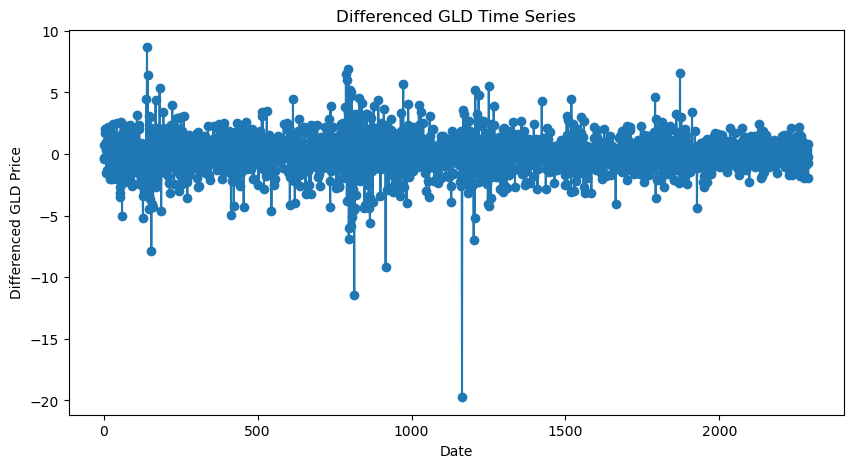

After differencing:
ADF Statistic: -10.771273
p-value: 0.000000


In [ ]:
if result[1] > 0.05:
    print("Data is non-stationary. Differencing the data to achieve stationarity.")
    # First differencing
    gld_diff = gld_series.diff().dropna()
    
    # Plot the differenced series
    plt.figure(figsize=(10, 5))
    plt.plot(gld_diff, marker='o')
    plt.title("Differenced GLD Time Series")
    plt.xlabel("Date")
    plt.ylabel("Differenced GLD Price")
    plt.show()
    
    # Re-run ADF test on differenced data
    result_diff = adfuller(gld_diff)
    print("After differencing:")
    print("ADF Statistic: %f" % result_diff[0])
    print("p-value: %f" % result_diff[1])
    d = 1  # The order of differencing
else:
    print("Data is stationary. No differencing is required.")
    gld_diff = gld_series
    d = 0

## Identify p and q Using ACF and PACF Plots

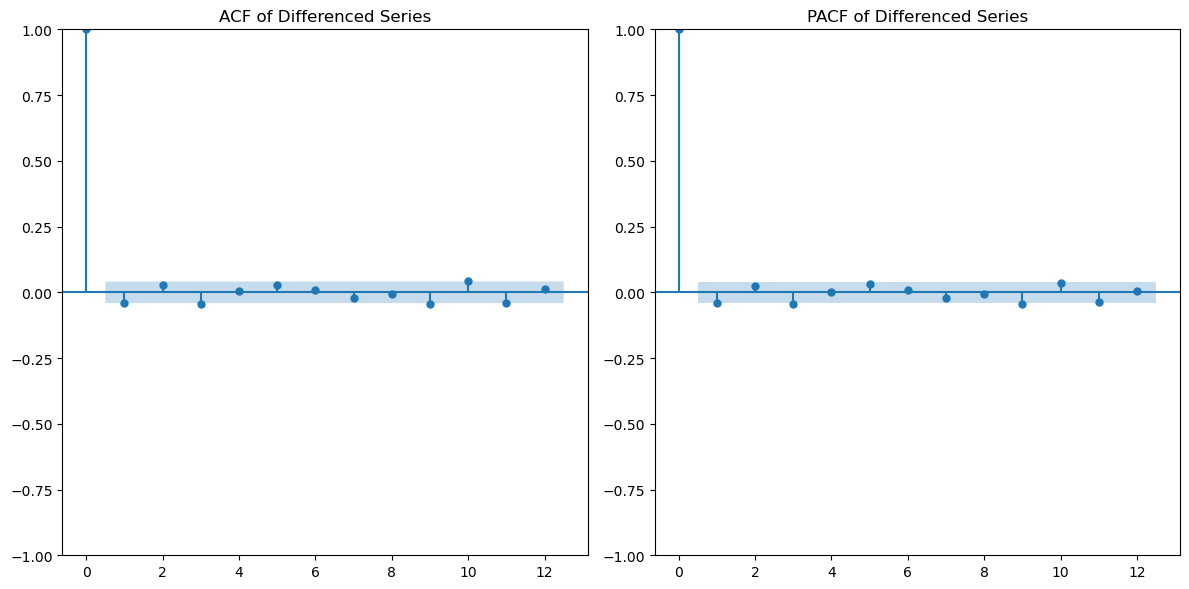

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(gld_diff, lags=12, ax=plt.gca())
plt.title("ACF of Differenced Series")

plt.subplot(122)
plot_pacf(gld_diff, lags=12, ax=plt.gca(), method='ywm')
plt.title("PACF of Differenced Series")
plt.tight_layout()
plt.show()

In [10]:
model_110 = ARIMA(gld_series, order=(1,1,0)).fit()
print("ARIMA(1,1,0) AIC:", model_110.aic)

ARIMA(1,1,0) AIC: 8470.965441814897


In [11]:
model_011 = ARIMA(gld_series, order=(0,1,1)).fit()
print("ARIMA(0,1,1) AIC:", model_011.aic)

ARIMA(0,1,1) AIC: 8471.132032932544


In [9]:
model_111 = ARIMA(gld_series, order=(1,1,1)).fit()
print("ARIMA(1,1,1) AIC:", model_111.aic)

ARIMA(1,1,1) AIC: 8464.019556383844


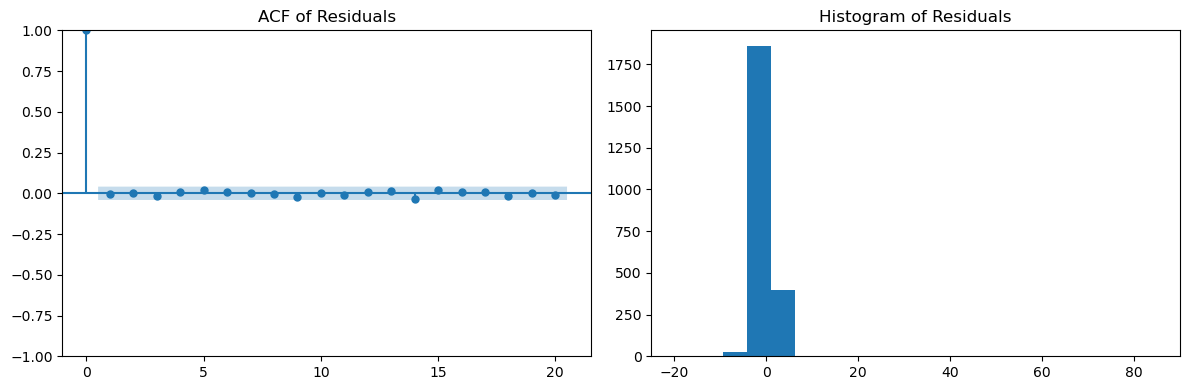

In [15]:
residuals = model_111.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sm.graphics.tsa.plot_acf(residuals, lags=20, ax=ax[0])
ax[0].set_title("ACF of Residuals")

ax[1].hist(residuals, bins=20)
ax[1].set_title("Histogram of Residuals")

plt.tight_layout()
plt.show()

In [ ]:
model = ARIMA(gld_series, order=(1,1,1))
model_fit = model.fit()

In [17]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    GLD   No. Observations:                 2290
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4229.010
Date:                Sun, 16 Feb 2025   AIC                           8464.020
Time:                        17:08:49   BIC                           8481.227
Sample:                             0   HQIC                          8470.295
                               - 2290                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9851      0.011    -91.404      0.000      -1.006      -0.964
ma.L1          0.9724      0.014     67.190      0.000       0.944       1.001
sigma2         2.3564      0.023    100.709      0.0

In [18]:
forecast_horizon = 10

# Forecast the next 10 periods
forecast = model_fit.forecast(steps=forecast_horizon)

print(forecast)

2290    122.560518
2291    122.544049
2292    122.560272
2293    122.544292
2294    122.560033
2295    122.544526
2296    122.559802
2297    122.544754
2298    122.559577
2299    122.544976
Name: predicted_mean, dtype: float64


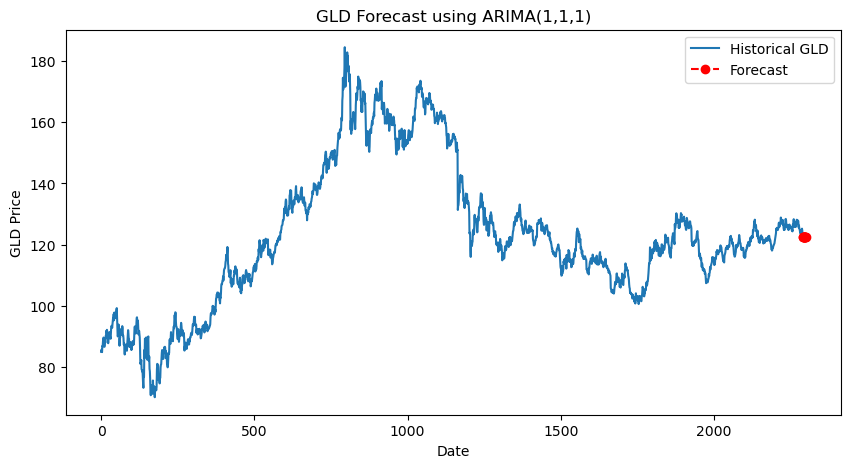

In [19]:
plt.figure(figsize=(10,5))

# Plot historical data
plt.plot(gld_series, label='Historical GLD')

# Plot forecast
plt.plot(forecast, label='Forecast', marker='o', linestyle='--', color='red')

plt.title('GLD Forecast using ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
